Prepared by Mike Mudimba NS2100042 (CSC 5741: Data Mining and Warehousing) 
Mini Project Practical Assignment

Topic Modeling in Python: For the Zambian Watchdog Facebook page post comments using Latent Dirichlet Allocation (LDA)
Work breakdown is as follows:

1. Loading data
2. Data cleaning
3. Exploratory analysis
4. Preparing data for LDA analysis
5. LDA model training
6. Analyzing LDA model results

# Loading data

In [1]:
# Importing modules
import pandas as pd
import os

os.chdir('..')

# Read data into papers
papers = pd.read_csv("C:/Users/mikem/Zambian Watchdog Facebook/scrapped_data.csv")

# Print head
papers.head()

,Name,Comment,Reactions
0,Pumulo Mayungo,This is the reason why I trust and respect sol...,159
1,Collins Kafunga,Well done zambia army your loyalty is to the p...,75
2,John Marks,These PF cadres actually complained to their S...,16
3,Barbra M Chembo,The moment I heard soldiers are deployed to sa...,37
4,Mako Kutemba,Job well done to our Zambian soldiers for prot...,8


# Data Cleaning

In [2]:
# Remove the columns
papers = papers.drop(columns=['Name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,Comment,Reactions
37,But why 10 &11 opening in boarding schools whi...,1
19,"Very embarrassing ,but why is PF and lungu for...",14
55,"I was there, it's true.",19
66,Here is a public\nannouncement please be infor...,1
56,The late Un Patriotic Front dead burial is nex...,21


# Remove punctuation/lower casing

In [3]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['Comment'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

37    but why 10 &11 opening in boarding schools whi...
19    very embarrassing but why is pf and lungu forc...
55                                i was there it's true
66    here is a public\nannouncement please be infor...
56    the late un patriotic front dead burial is nex...
Name: paper_text_processed, dtype: object

# Exploratory Analysis

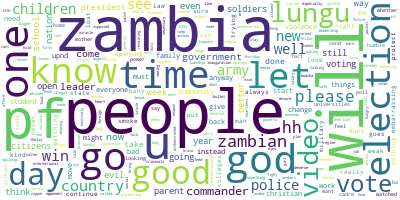

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Prepare data for LDA Analysis

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['opening', 'boarding', 'schools', 'days', 'schools', 'opening', 'write', 'exam', 'one', 'day', 'balancing', 'something', 'fishy']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 1), (10, 1)]


# LDA model training

In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"zambia" + 0.013*"people" + 0.011*"us" + 0.011*"go" + 0.011*"pf" + '
  '0.010*"like" + 0.009*"children" + 0.008*"year" + 0.008*"even" + '
  '0.008*"new"'),
 (1,
  '0.018*"zambia" + 0.018*"one" + 0.014*"parents" + 0.014*"election" + '
  '0.013*"good" + 0.012*"let" + 0.011*"back" + 0.011*"children" + 0.008*"move" '
  '+ 0.008*"please"'),
 (2,
  '0.011*"go" + 0.010*"bad" + 0.010*"instead" + 0.010*"single" + '
  '0.010*"citizens" + 0.009*"police" + 0.009*"pf" + 0.009*"zambia" + '
  '0.009*"one" + 0.009*"day"'),
 (3,
  '0.021*"zambia" + 0.011*"one" + 0.010*"video" + 0.009*"like" + '
  '0.009*"commander" + 0.009*"army" + 0.008*"girlfriend" + 0.008*"go" + '
  '0.007*"first" + 0.007*"please"'),
 (4,
  '0.030*"pf" + 0.019*"people" + 0.011*"lungu" + 0.010*"evil" + 0.009*"good" + '
  '0.008*"vote" + 0.008*"like" + 0.008*"government" + 0.007*"opening" + '
  '0.007*"infrastructure"'),
 (5,
  '0.015*"way" + 0.015*"sori" + 0.015*"well" + 0.013*"done" + 0.010*"leaders" '
  '+ 0.010*"god"

# Analyzing LDA model results

In [9]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/mikem/Zambian Watchdog Facebook/results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/mikem/Zambian Watchdog Facebook/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.097168  0.011273       1        1  18.351784
9      0.011642  0.017500       2        1  16.385088
4      0.135123 -0.068718       3        1  12.388341
3     -0.031643  0.084056       4        1  10.731583
1      0.071785  0.120991       5        1  10.294759
6      0.015331 -0.068065       6        1   7.484047
7     -0.059185 -0.073019       7        1   7.467283
2      0.017960  0.008811       8        1   6.969704
5     -0.043364 -0.001863       9        1   6.030246
8     -0.020482 -0.030967      10        1   3.897163, topic_info=       Term       Freq      Total Category  logprob  loglift
294    well   5.000000   5.000000  Default  30.0000  30.0000
106   video   5.000000   5.000000  Default  29.0000  29.0000
66      way   2.000000   2.000000  Default  28.0000  28.0000
6       one   9.000000   9.000000  Default  27.0000  27.0000
18       pf  17.000000  17.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
778   times   0.398879   2.092454  Topic10  -5.0569   1.5875
268    come   0.398877   3.400120  Topic10  -5.0569   1.1020
39   please   0.398872   5.316855  Topic10  -5.0569   0.6549
118   since   0.398871   1.516033  Topic10  -5.0569   1.9097
177  better   0.398869   3.331470  Topic10  -5.0569   1.1224

[552 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
67        1  0.736046   abiding
676       4  0.602965    across
933       5  0.861022   actions
252       9  0.643080    advise
21        1  0.495897   advised
...     ...       ...       ...
159       2  0.223058  zambians
159       4  0.223058  zambians
159       5  0.223058  zambians
159       8  0.223058  zambians
295       2  0.723542      zulu

[607 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 5, 4, 2, 7, 8, 3, 6, 9])